# Lecture 7: Bias-Variance Tradeoff, Regularization
## 4/5/2019

### Table Of Contents
* [Recap](#recap)
* [Bias-Variance Tradeoff](#bv-tradeoff)
    * [Bias](#bias)
    * [Variance](#variance)
    * [The Tradeoff](#the-tradeoff)
    * [Polynomial Regression](#polynomial-regression)
* [Regularization](#regularization)
    * [Ridge](#ridge)
    * [LASSO](#lasso)
    * [Visualizing Ridge and Lasso](#visualizing-ridge-and-lasso)
    * [Regularization and Bias Variance](#regularization-and-bias-variance)
    * [Lambda](#lambda)
    * [Validation on Lambda](#validation-on-lambda)
* [Exercises](#exercises)

![alt text](fit_graphs.png "Fit Graphs")

> Bias/Variance is one way to understand Overfitting and Underfitting 


If we look at the first model, the points seem to follow some sort of curve, but our predictor is linear (not very complicated) and *unable to fit all the points* no matter how we wiggle it. We have chosen a model which is not complex enough to accurately capture all the information from our data set. 

In the last model, the predictor is super complex and adjusts based on every point. In this case, the model changes too much based on te data and isnt really thinking 'big picture'. This model is fitting too much to the minor jitters. 

**High bias/Low Variance ~ underfitting**

**Low bias/High Variance ~ overfitting**

**Goldilocks - porridge**


Summary: We try to fiddle with bias/variance to get better models. Variance is important! because otherwise we only are building a model for our train not our normal dataset.

<sub> Bias-Variance error decomposition only works for convex loss functions (especially L2) </sub>

# Thinking Experiment

Lets say we were building a model of a dog. On the left we would have a model that would classify everything as a dog (including a hippo) versus on the far right 

<table style="width:100%">
  <tr>
    <th>Underfitting</th>
    <th>Just Right</th>
    <th>Overfitting</th>
  </tr>
  <tr>
    <td><img src="https://static01.nyt.com/images/2018/02/27/science/27DOGS1-top/27DOGS1-1519346420476-articleLarge.jpg?quality=75&auto=webp&disable=upscale"/></td>
    <td><img src="https://i.imgur.com/EH6OxdZ.png"/></td>
    <td><img src="https://cdn2-www.dogtime.com/assets/uploads/gallery/samoyed-dogs-and-puppies/samoyed-dogs-puppies-1.jpg"/></td>
  </tr>
</table>

# Why do we care?

Bias-Variance is *directly related* to what a model predicts and algorithmic bias. (Articles [here](https://www.zdnet.com/article/what-is-bias-in-ai-really-and-why-cant-ai-neutralize-it/), [here](https://academicworks.cuny.edu/cgi/viewcontent.cgi?article=1042&context=jj_etds) and [here](https://www.cio.com/article/3385123/bias-in-ai-creating-artificial-intelligence-that-is-less-like-humans.html))

Bias-Variance is the main idea behind the other methods we will cover here. i.e. **"What are some ways to try and make appropriate bias/variance tradeoffs"**

--


Frequently people feel they should minimize bias even at the expense of variance. They think that presence of bias indicates fundamental issues with their model and algorithm. Yes, variance is also bad but a model with high variance could at least predict well on average, at least it is not fundamentally wrong.

This is mistaken. A high variance and low bias model can preform well in some sort of long-run average sense. However, in practice modelers are always dealing with a concrete actual data set in the context of some business problem. In these cases, long run averages are irrelevant, what is important is the performance of the model on the data you actually have and in this case bias and variance are equally important and one should not be improved at an excessive expense to the other. [Source](http://scott.fortmann-roe.com/docs/BiasVariance.html)





<a id='bv-tradeoff'></a>
# Bias-Variance Tradeoff

When making this tradeoff we do it by proxy -- using various metrics:

Today we'll perform **model evaluation**, where we'll judge how our linear regression models actually perform. Last week, we talked about **loss functions**, a function that describes a numerical value for how far your model is from the true values.

Today we will use:
$$\text{Mean Squared Error: } \frac{1}{n}\sum_{i=1}^n \left(y_i - \hat{f}(x_i)\right)^2$$

In this loss function, $y_i$ is a scalar, and $x_i$ is a $p$ dimensional vector, because there are $p$ features. This loss is called **mean squared error**, or **MSE**.

(i.e. if we have x=1, y=2, but our model says f(x=1)=y=3. then $(2-3)^2$

## Model Evaluation

<a id='bias'></a>
## Bias

When evaluating a model, the most intuitive first step is to look at how well the model performs. For classification, this may be the percentage of data points correctly classified, or for regression it may be how close the predicted values are to actual. The **bias** of a model is *a measure of how close our prediction is to the actual value on average from an average model*. 

Note that bias is **not** a measure of a single model, it encapuslates the scenario in which we collect many datasets, create models for each dataset, and average the error over all of models. Bias is not a measure of error for a single model, but a more abstract concept describing the average error over all errors. A low value for the bias of a model describes that on average, our predictions are similar to the actual values.


<sub> Super Mathy: Squared difference between best possible prediction for x, f(x), and our “long-term” expectation for what the learner will do if we averaged over many datasets D: $E_D[h_D(x)]$  </sub>

<a id='variance'></a>
## Variance
The **variance** of  a model relates to the variance of the distribution of all models. In the previous section about bias, we envisoned the scenario of collecting many datasets, creating models for each dataset, and averaging the error overall the datasets. Instead, the variance of a model describes the variance in prediction. While we might be able to predict a value very well on average, if the variance of predictions is very high this may not be very helpful, as when we train a model we only have one such instance, and a high model variance tells us little about the true nature of the predictions. A low variance describes that our model will not predict very different values for different datasets.

<sub> Super Mathy: Squared difference btwn our longterm expectation for the learners performance, $E_D[h_D(x)]$, and what we expect in a representative run on a dataset D ($\hat{y}$)  </sub>

**We can take a look at how bias and variance differ and can be explained in a dataset with the following diagram:**

![alt text](BiasVariance.jpg "Bias Variance Visualization")

<sub style=''><p style='font-size:5pt;color:gray;text-align:right'>source:http://scott.fortmann-roe.com/docs/BiasVariance.html</p></sub>


The image describes what bias and variance are in a more simplified example. Consider that we would like to create a model that selects a point close to the center. The models on the top row have low bias, meaning the center of the cluster is close to the red dot on the target. The models on the left column have low variance, the clusters are quite tight, meaning our predictions are close together.

**Question: What do the blue dots represent? What about the bullseye?**

**Question: What is the order of best scenarios?**


<a id='the-tradeoff'></a>
## The Tradeoff

We are trying to minimize **expected error**, or the average **MSE** over all datasets. It turns out (with some advanced probability gymnastics), that:

$$\text{Mean Squared Error} = \text{Noise Variance} + \text{Bias}^2 + \text{Variance}$$

Note that $\text{Noise Variance}$ is constant: we assume there is some noise, and $\text{moise variance}$ is simply a value that describes how noisy your dataset will be on average. This is often also called "irreducible noise", as it is literally irreducible, we cannot avoid this. 

Furthermore, notice that the equation above is the sum of (squared) bias and variance. Thus there is a literal tradeoff between these two, since decreasing one increases the other. This defines what is known as the **bias variance tradeoff**. 

![alt text](BiasVarianceTradeoff.png "Bias Variance Tradeoff")

<sub style=''><p style='font-size:5pt;color:gray;text-align:right'>source:http://scott.fortmann-roe.com/docs/BiasVariance.html</p></sub>

**Why does this happen?**

At some point, as we decrease **bias**, instead of getting closer to the **true model** $h$, we go past and try to fit to the $\epsilon$ (noise) that is part of our current dataset. This is equivalent to making our model more noisy, or **overfit** on our dataset, which means that over all datasets, it has more **variance**.

**Questions for understanding**:
> 1. Where does underfitting and overfitting lie in the graph above? How do they relate to bias and variance?
> 2. Why can't we usually just make a bunch of models with low bias and high variance and average them?
> 3. Why is low variance important in models?

<a id='polynonmial-regression'></a>
## Polynomial Regression

Let's revisit the polynomial problem that we have discussed.

In this case, if our model has degree $d$, we have $d + 1$ features: $x = [x^0, x^1, ..., x^d]$. Now, we have a linear model with $d + 1$ features:

$$\hat{f}(x) = \sum_{i=0}^{d} a_i x^i$$

Model complexity in this case is the degree of the polynomial. As we saw last week, as $d$ increases, model complexity increases. The model gets better, but then gets erratic. This directly corresponds to the bias-variance graph above.

In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from plotting import overfittingDemo, plot_multiple_linear_regression, ridgeRegularizationDemo, lassoRegularizationDemo
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

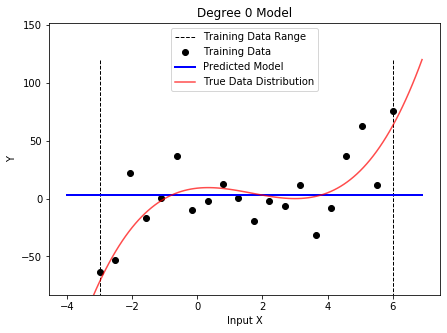

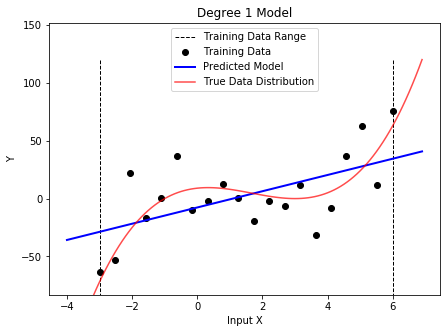

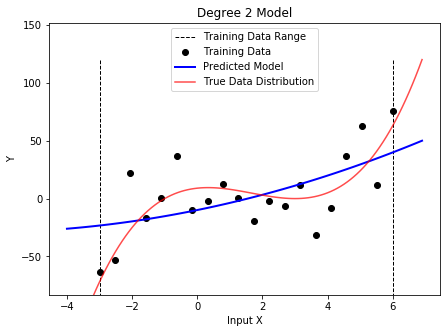

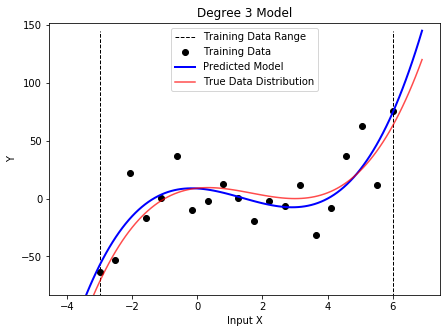

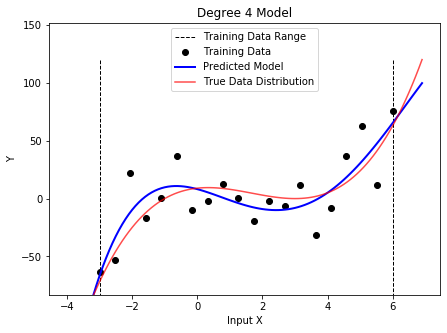

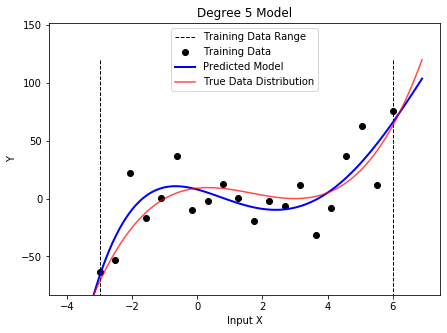

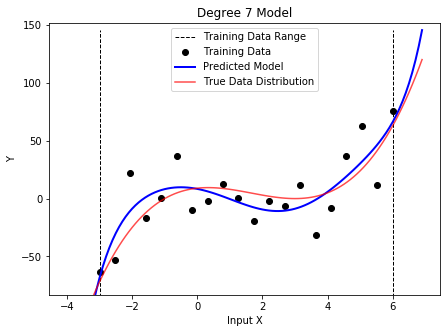

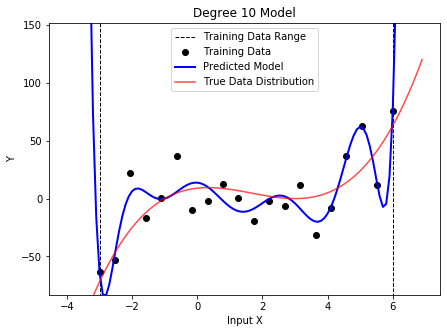

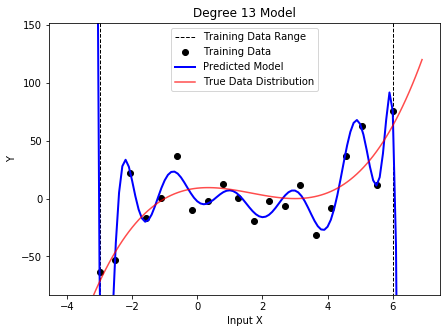

In [3]:
overfittingDemo()

As we saw from last time, the best model was a degree 3 model.

<a id='regularization'></a>
# Regularization

We talked about **validation** as a means of combating overfitting. However, this is not the only method to combat overfitting. Another method to do so is to add *regularization* terms to our loss function. **Regularization** basically penalizes complexity in our models. This allows us to add explanatory variables to our model without worrying as much about overfitting. Here's what our ordinary least squares model looks like with a regularization term:

$$\hat{\boldsymbol{\theta}} = \arg\!\min_\theta \sum_{i=1}^n (y_i - f_\boldsymbol{\theta}(x_i))^2 + \lambda R(\boldsymbol{\theta})$$

We've written the model a little differently here, but the first term is the same as the ordinary least squares regression model you learned last week. This time it's just generalized to any function of $x$ where $\theta$ is a list of parameters, or weights on our explanatory variables, such as coefficients to a polynomial. We're minimizing a loss function to find the best coefficients for our model. 

The second term is the **regularization** term. The $\lambda$ parameter in front of it dictates how much we care about our regularization term – the higher $\lambda$ is, the more we penalize large weights, and the more the regularization makes our weights deviate from OLS. 

**Question**: What happens when $\lambda = 0$?

So, what is $R(\theta)$ in the equation? There are a variety of different regularization functions that could take its place, but today, we'll just talk about the two most common types of functions: **ridge regression** and **LASSO regression**.


$$\begin{align}\text{ Ridge (L2 Norm)}: &\  R(\boldsymbol{\theta}) = \|\theta\|_2^2 = \sum_{i=1}^p \theta_i^2\\
\text{ LASSO (L1 Norm)}: &\ R(\boldsymbol{\theta}) = \|\theta\|_1=\sum_{i=1}^p \lvert \theta_i\rvert\end{align}$$

<a id='ridge'></a>
## Ridge 
$$\hat{\boldsymbol{\theta}} = \arg\!\min_\theta \sum_{i=1}^n (y_i - \hat{f_\theta}(x_i))^2 + \lambda \|\theta\|_2^2$$
In **ridge** regression, the regularization function is the sum of squared weights. One nice thing about ridge regression is that there is always a unique, mathematical solution to minimizing the loss of that term. The solution involves some linear algebra, which we won't get into in this notebook, but the existence of this formula makes this minimization computationally easy to solve!

$$\hat{\boldsymbol{\theta}} = \left(\boldsymbol{X}^T \boldsymbol{X} + \lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{Y}$$

If you recall, the solution to linear regression was of the form:

$$\hat{\boldsymbol{\theta}} = \left(\boldsymbol{X}^T \boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{Y}$$

And we said that the $\boldsymbol{X}^T\boldsymbol{X}$ isn't always invertible. **What about $\boldsymbol{X}^T \boldsymbol{X} + \lambda\boldsymbol{I}$?**

Turns out, this is always invertible! If you are familiar with linear algebra, this is equivalent to adding $\lambda$ to all the eigenvalues of $X^TX$. 

---

L2 regularization. Regularization trades a bit of model accuracy for improved generalization and works by constraining the size of model parameters to "reasonable" values. L2 regularization constrains coefficients to a spherical hyper volume by adding an L2 norm penalty term to the linear model loss function. The term Ridge from the original Hoerl and Kennard Ridge paper was taken from the "ridge traces" on their coefficient plots. Unfortunately, the ridge constraint region looks like a lasso and the lasso constraint region looks like a ridge. [Source](https://explained.ai/statspeak/index.html)



**To see this in practice**, we'll first create a regular linear regression model, and compare how it does against models using regularization on the `mpg` dataset we used from last week! We'll be constructing models of `displacement` vs. `mpg`, and seeing the difference from there!

First, let's construct the `mpg_train` dataset!

In [4]:
mpg = pd.read_csv("mpg.csv", index_col='name')# load mpg dataset
mpg = mpg.loc[mpg["horsepower"] != '?'].astype(float) # remove columns with missing horsepower values
mpg_train, mpg_test = train_test_split(mpg, test_size = .2, random_state = 0) # split into training set and test set
mpg_train, mpg_validation = train_test_split(mpg_train, test_size = .5, random_state = 0)
mpg_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
toyota corolla,34.0,4.0,108.0,70.0,2245.0,16.9,82.0,3.0
buick century,17.0,6.0,231.0,110.0,3907.0,21.0,75.0,1.0
cadillac eldorado,23.0,8.0,350.0,125.0,3900.0,17.4,79.0,1.0
bmw 320i,21.5,4.0,121.0,110.0,2600.0,12.8,77.0,2.0
ford fairmont futura,24.0,4.0,140.0,92.0,2865.0,16.4,82.0,1.0


**Exercise:** Now, let's create a regular linear regression model using the same process we've learned before (fitting, predicting, finding the loss)!

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x_train = np.vander(mpg_train["displacement"], 13)
y_train = mpg_train[["mpg"]]

x_validation = np.vander(mpg_validation["displacement"], 13)
y_validation = mpg_validation[["mpg"]]

# instantiate your model
linear_model = LinearRegression()

# fit the model
linear_model.fit(x_train, y_train)
# make predictions on validation set
linear_prediction = linear_model.predict(x_validation)
# find mean squared error
linear_loss = mean_squared_error(y_validation, linear_prediction)
lin_r2 = r2_score(y_validation, linear_prediction)

print("Root Mean Squared Error of Linear Model: {:.2f}".format(linear_loss))
print("R2 of Linear Model: {:.2f}".format(lin_r2))

Root Mean Squared Error of Linear Model: 25.09
R2 of Linear Model: 0.60


**Exercise:** Using what you did above as reference, do the same using a Ridge regression model!

In [7]:
from sklearn.linear_model import Ridge

linear_model = Ridge()
linear_model.fit(x_train, y_train)
linear_prediction = linear_model.predict(x_validation)
ridge_loss = mean_squared_error(y_validation, linear_prediction)
ridge_r2 = r2_score(y_validation, linear_prediction)

print("Root Mean Squared Error of Linear Model: {:.2f}".format(linear_loss))
print("Root Mean Squared Error of Ridge Model: {:.2f}".format(ridge_loss))
print("R2 of Linear Model: {:.2f}".format(lin_r2))
print("R2 of Ridge Model: {:.2f}".format(ridge_r2))

Root Mean Squared Error of Linear Model: 25.09
Root Mean Squared Error of Ridge Model: 20.11
R2 of Linear Model: 0.60
R2 of Ridge Model: 0.68


A final note on ridge is that ridge regression helps with *robustness*. (Don't worry if you don't understand this part, it's not necessary to understand the rest of the lecture.
<img src='robustness.JPG' width=400/>
Consider the above diagram. <br>
It turns out we can write the weights of least squares regression as a linear combination of the inverses of the singular values. When a matrix is non-invertible, these singular values are zero. However, when a matrix is almost non-invertible, these singular values are very small, leading their inverses to be very large. This leas them to dominate the least squares regression.
Ridge regression fixes this problem by downweighting very small singular values into something more reasonable. In the least squares case, tiny changes to the input data could have large effects on the model if it's along small singular values. Ridge regression is more *robust* to these changes.

<a id='lasso'></a>
## LASSO
$$\hat{\boldsymbol{\theta}} = \arg\!\min_\theta \sum_{i=1}^n (y_i - f_\boldsymbol{\theta}(x_i))^2 + \lambda \|\theta\|_1$$
In **LASSO** regression, the regularization function is **the sum of absolute values of the weights**. One key thing to note about **LASSO** is that it is **sparsity inducing**, meaning it forces weights to be zero values rather than really small values (which can happen in **Ridge Regression**), leaving you with fewer explanatory variables in the resulting model! Unlike Ridge Regression, LASSO doesn't necessarily have a unique solution that can be solved for with linear algebra, so there's no formula that determines what the optimal weights should be.


---

L1 regularization. Regularization trades a bit of model accuracy for improved generalization and works by constraining the size of model parameters to "reasonable" values. L1 regularization constrains coefficients to a diamond shaped hyper volume by adding an L1 norm penalty term to the linear model loss function. The term LASSO means "Least absolute Shrinkage and Selection Operator" from the original Tibshirani paper. The LASSO name is perfectly fine except for the fact that the constraint region has lots of pointy discontinuities and looks like it should be called "ridge regularization" from the shape.
[Source](https://explained.ai/statspeak/index.html)



In [34]:
from sklearn.linear_model import Lasso

linear_model = Lasso()
linear_model.fit(x_train, y_train)
y_val_pred = linear_model.predict(x_validation)


lasso_loss = mean_squared_error(y_validation, linear_prediction)
lasso_r2 = r2_score(y_validation, y_val_pred)


print("Root Mean Squared Error of Linear Model: {:.2f}".format(linear_loss))
print("Root Mean Squared Error of LASSO Model: {:.2f}".format(lasso_loss))
print("Root Mean Squared Error of Ridge Model: {:.2f}".format(ridge_loss))
print("R2 of Linear Model: {:.2f}".format(lin_r2))
print("R2 of Ridge Model: {:.2f}".format(ridge_r2))
print("R2 of Lasso Model: {:.2f}".format(lasso_r2))

Root Mean Squared Error of Linear Model: 25.09
Root Mean Squared Error of LASSO Model: 21.44
Root Mean Squared Error of Ridge Model: 20.11
R2 of Linear Model: 0.60
R2 of Ridge Model: 0.68
R2 of Lasso Model: 0.66


As we can see, both **Ridge Regression and LASSO Regression** minimized the loss of our linear regression models, so maybe penalizing some features allowed us to prevent overfitting on our dataset!

##### <a id='norm-balls'></a>
### Derivatives and Sparsity

Let's take at another visualization that may help build some intuition behind how both of these regularization methods work!

<img src='bvdiff.JPG' width=400/>

The above plot is of the ridge regression penalty in blue and the LASSO in red. Note that when the values are small, the LASSO penalty is actually higher than the ridge penalty.


**Question**: Based on these visualizations, could you explain why LASSO is sparsity-inducing?

For a more mathematical motivation, consider the derivative of the LASSO and ridge penalties. 

$$\frac{\partial}{\partial w} w^2 = 2w$$
$$\frac{\partial}{\partial w} |w| = sign(w)$$

Recall that gradient descent algorithms go along the derivative of the loss. When we train a neural network to minimize these penalties, a network trained on LASSO will reduce the penalty to 0 (when possible) as the derivative is always 1. However, with the ridge penalty, the loss will essentailly "flatten out" when w approaches zero, and the network will pick a value for w that is close to zero, but not quite zero.

<img src='lassovsridge.JPG' width=400/>

Results from an emperical statement.


<a id='regularization-and-bias-variance'></a>
## Regularization and Bias Variance
As we mentioned earlier, **bias** is the average linear squares loss term across multiple models of the same family (e.g. same degree polynomial) trained on separate datasets. **Variance** is the average variance of the weight vectors (coefficients) on your features. 

Without the regularization term, we’re just minimizing bias; the regularization term means we won’t get the lowest possible bias, but we’re exchanging that for some lower variance so that our model does better at generalizing to data points outside of our training data.

<a id='lambda'></a>
## Lambda

We said that $\lambda$ is how much we care about the regularization term, but what does that look like? Let's return to the polynomial example from last week, and see what the resulting models look like with different values of $\lambda$ given a degree 8 polynomial.

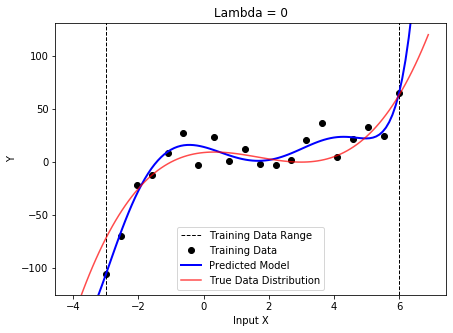

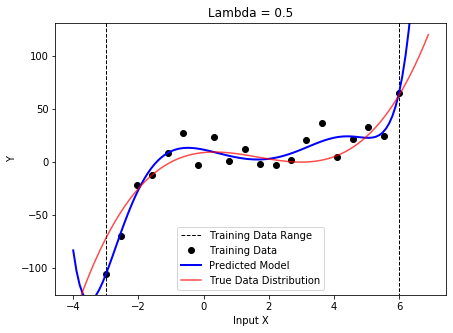

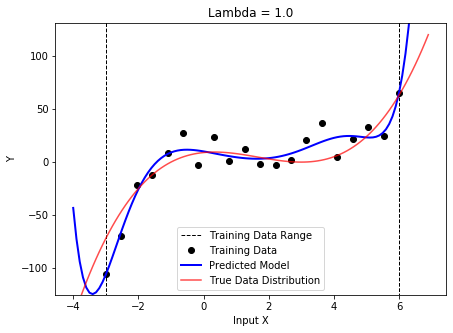

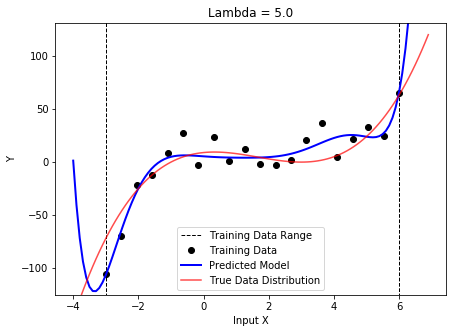

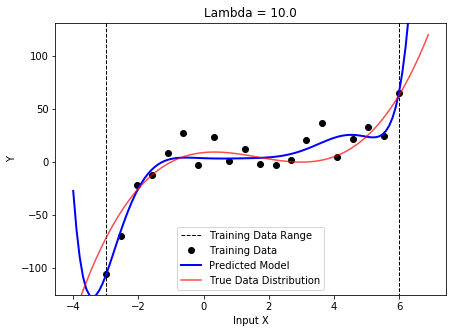

In [35]:
ridgeRegularizationDemo([0, 0.5, 1.0, 5.0, 10.0], 8)

From the diagram above, it's difficult to determine which lambda value help fit our model the closest to the true data distribution. So, **how do we know what to use for $\lambda$ (or `alpha` in the `sklearn.linear_model` constructors)?**

That's right, let's use the process of **validation** here! In this case, we'd be finding the value for lambda that **minimizes the loss for ridge regression, and then the one that minimizes the loss for LASSO regression**!

<a id='validation-on-lambda'></a>
## Validation on Lambda
Let's try to find the best $\lambda$ for the degree 20 polynomial on `displacement` from above.

In [ ]:
lambdas = np.arange(0, 200) # create a list of potential lambda values

# create a list containing the corresponding mean_squared_error for each lambda usinb both ridge and lasso regression
ridge_errors = [] 
lasso_errors = []

for l in lambdas:
    
    ridge_errors.append(...)
        
    lasso_errors.append(...)

# finds the index of the minimum value in each list
answer = ridge_errors.index(min(ridge_errors)), lasso_errors.index(min(lasso_errors))
answer

As we can see from above, we've been able to determine which lambdas minimizes our ridge regression model and our LASSO regression model through validation by iterating through potential lambda values and finding the ones that minimize our loss for each model!

<a id='validation'></a>
# Validation

When we train machine learning models, we use three types of data, used for different purposes. <br>

### Training data
The data we use to train the model (typically around 80% of the data)

### Validation data
The data we use to fine tune the model and adjust hyperparameters (typically around 15% of the data)

### Test data
The data we use to evaluate the model's performance (only used once, typically around 5% of the data)


<img src="https://i.imgur.com/LLPNd4u.png" width=400px height=400px />





<img src="http://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" width=600 height=600 />



*tl;dr you train your dog classifier on 3 of your dogs and then test it out on your friend's 4 dogs. Don't ask why we have so many dogs*  


Cross-validation is a technique for evaluating ML models by training ML models on different subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.  [Source](https://docs.aws.amazon.com/machine-learning/latest/dg/cross-validation.html)

---

Cross-validation is primarily a way of measuring the predictive performance of a statistical model. Every statistician knows that the model fit statistics are not a good guide to how well a model will predict: high 
$R^2$ does not necessarily mean a good model. It is easy to over-fit the data by including too many degrees of freedom and so inflate $R^2$ and other fit statistics. For example, in a simple polynomial regression I can just keep adding higher order terms and so get better and better fits to the data. But the predictions from the model on new data will usually get worse as higher order terms are added. [Source](https://robjhyndman.com/hyndsight/crossvalidation/)


<img src="https://i.stack.imgur.com/1QU0m.png" />
<img src="https://miro.medium.com/max/1554/1*-xAhQ9ULYqmNOxRU4e_MXQ.png" />


When we run cross validation we tend to see stagnant test error but consistently better train error, telling us that our model is really good at fitting our training dataset but not good at modeling the overall dataset.


**Question**
What could you say is happenning in each of these scenarios? {overfitting, underfitting, good model}
#### high training error, high validation error
#### low training error, high validation error
#### low training error, low validation error

<a id='conclusion'></a>
# Conclusion

Through the course of the notebook, we introduced two main concepts, **bias** and **variance**, and how the two relate with one another when it comes to finding the best model for our dataset! We also went into different methods we can use to minimize overfitting our model, and in turn lower variance, by taking look at a process called **regularization**. We saw that the two main regression models, **ridge regression** and **LASSO regression**, and saw the difference between the two (ridge -> penalize large weights, LASSO -> make weights sparse). We also took a look at different visualizations between the two to build up some more intuition behind how they work, through **graphs** and **derivatives**. Finally, we went through a familiar process (**validation**) to determine what the best values of lambda were for our models, officially ending our journey of **bias** and **variance**, and how we can minimze both in our models!

# Congratulations! You are now a Bias + Variance Ninja!

<a id='exercises'></a>
## Exercises

1. What happens as $\lambda$ increases?
    1. bias increases, variance increases
    2. bias increases, variance decreases
    3. bias decreases, variance increases
    4. bias decreases, variance decreases

**Insert answer here**:

2. **True** or **False**? Bias is how much error your model makes.

**Insert answer here:**

3. What is **sparsity**?

**Insert answer here:**

4. For each of the following, choose **ridge**, **lasso**, **both**, or **neither**:
    1. L1-norm
    2. L2-norm
    3. Induces sparsity
    4. Has analytic (mathematical) solution
    5. Increases bias
    6. Increases variance

**Insert answer here:**

5. Which one is better to use: Ridge Regression or LASSO Regression?

**Insert answer here:**

### Congrats! You've finished our few conceptual questions, now you can help out the rest of your peers and use the rest of the time to work on the intermediate project with your project group!